In [63]:
import pandas as pd

In [64]:
diabetes = pd.read_csv('pima-indian-diaetes.csv')

In [65]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,148,72,35,0,33.6,0.627,50,1,B
1,1,85,66,29,0,26.6,0.351,31,0,C
2,8,183,64,0,0,23.3,0.672,32,1,C
3,1,89,66,23,94,28.1,0.167,21,0,B
4,0,137,40,35,168,43.1,2.288,33,1,B


In [66]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [67]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [68]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x:(x-x.min())/(x.max()-x.min()))

In [69]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,C
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,B


In [70]:
import tensorflow as tf

In [71]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [72]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [73]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C'])

In [74]:
#ssigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [75]:
import matplotlib as plt
%matplotlib inline

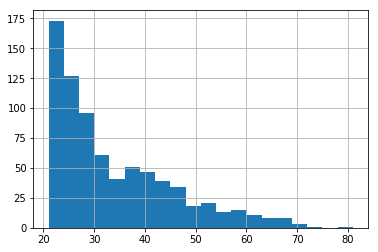

In [76]:
diabetes['Age'].hist(bins=20)

In [77]:
  age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70])

In [78]:
feat_cols = [num_preg,plasma_gluc,dias_press, tricep, insulin,bmi, diabetes_pedigree,
          assigned_group, age_bucket]

In [79]:
#Train test Split

In [80]:
x_data = diabetes.drop('Class',axis=1)

In [81]:
labels = diabetes['Class']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train , X_test, y_train, y_test = train_test_split(x_data,labels,test_size = 0.3, random_state = 101)

PArt 2

In [84]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train,
                                                batch_size = 10, 
                                                num_epochs=1000,shuffle= True)

In [85]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Rahul\\AppData\\Local\\Temp\\tmpjqfh67uy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002446943AB70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [86]:
model.train(input_fn = input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Rahul\AppData\Local\Temp\tmpjqfh67uy\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 193.85
INFO:tensorflow:loss = 4.26672, step = 101 (0.551 sec)
INFO:tensorflow:global_step/sec: 311.73
INFO:tensorflow:loss = 3.99318, step = 201 (0.281 sec)
INFO:tensorflow:global_step/sec: 353.336
INFO:tensorflow:loss = 5.87803, step = 301 (0.283 sec)
INFO:tensorflow:global_step/sec: 304.689
INFO:tensorflow:loss = 2.45281, step = 401 (0.328 sec)
INFO:tensorflow:global_step/sec: 305.565
INFO:tensorflow:loss = 6.22926, step = 501 (0.329 sec)
INFO:tensorflow:global_step/sec: 258.279
INFO:tensorflow:loss = 5.7351, step = 601 (0.384 sec)
INFO:tensorflow:global_step/sec: 280.865
INFO

In [89]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test,
                                                batch_size = 10, 
                                                num_epochs=1,shuffle= True)

In [90]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-07-20:53:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rahul\AppData\Local\Temp\tmpjqfh67uy\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-07-20:53:38
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.744589, accuracy_baseline = 0.649351, auc = 0.797737, auc_precision_recall = 0.643445, average_loss = 0.529639, global_step = 1000, label/mean = 0.350649, loss = 5.09777, precision = 0.661765, prediction/mean = 0.373151, recall = 0.555556


In [91]:
results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79773659,
 'auc_precision_recall': 0.64344513,
 'average_loss': 0.52963853,
 'label/mean': 0.35064936,
 'loss': 5.0977712,
 'precision': 0.66176468,
 'prediction/mean': 0.37315065,
 'recall': 0.55555558,
 'global_step': 1000}

In [92]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                batch_size = 10, 
                                                num_epochs=1,shuffle= True)

In [93]:
predictions = model.predict(pred_input_func)

In [94]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rahul\AppData\Local\Temp\tmpjqfh67uy\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [95]:
my_pred

[{'logits': array([ 1.08657551], dtype=float32),
  'logistic': array([ 0.74773633], dtype=float32),
  'probabilities': array([ 0.25226367,  0.74773633], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-1.13241684], dtype=float32),
  'logistic': array([ 0.24371535], dtype=float32),
  'probabilities': array([ 0.75628465,  0.24371535], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.32187176], dtype=float32),
  'logistic': array([ 0.21050705], dtype=float32),
  'probabilities': array([ 0.78949296,  0.21050705], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.86749315], dtype=float32),
  'logistic': array([ 0.13383205], dtype=float32),
  'probabilities': array([ 0.86616796,  0.13383205], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=ob

In [96]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10]
                                       ,feature_columns=feat_cols,
                                      n_classes =2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Rahul\\AppData\\Local\\Temp\\tmphp79apmf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002446950F940>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [97]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=3)

In [98]:
feat_cols = [num_preg,plasma_gluc,dias_press, tricep, insulin,bmi, diabetes_pedigree,
          embedded_group_col, age_bucket]

In [101]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y = y_train,
                                                batch_size= 10, 
                                                num_epochs=1000 ,shuffle= True)

In [102]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10]
                                       ,feature_columns=feat_cols,
                                      n_classes =2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Rahul\\AppData\\Local\\Temp\\tmpgtxk3j3g', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002446969F6A0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [103]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Rahul\AppData\Local\Temp\tmpgtxk3j3g\model.ckpt.
INFO:tensorflow:loss = 7.28455, step = 1
INFO:tensorflow:global_step/sec: 168.773
INFO:tensorflow:loss = 5.08074, step = 101 (0.603 sec)
INFO:tensorflow:global_step/sec: 273.523
INFO:tensorflow:loss = 5.28229, step = 201 (0.366 sec)
INFO:tensorflow:global_step/sec: 282.615
INFO:tensorflow:loss = 6.48205, step = 301 (0.354 sec)
INFO:tensorflow:global_step/sec: 333.248
INFO:tensorflow:loss = 4.08274, step = 401 (0.295 sec)
INFO:tensorflow:global_step/sec: 367.233
INFO:tensorflow:loss = 3.15241, step = 501 (0.272 sec)
INFO:tensorflow:global_step/sec: 251.099
INFO:tensorflow:loss = 3.7913, step = 601 (0.398 sec)
INFO:tensorflow:global_step/sec: 299.451
IN

In [105]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y = y_test,
                                                batch_size= 10, 
                                                num_epochs=1 ,shuffle= True)

In [106]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-07-21:05:18
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Rahul\AppData\Local\Temp\tmpgtxk3j3g\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-07-21:05:19
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.766234, accuracy_baseline = 0.649351, auc = 0.840041, auc_precision_recall = 0.717573, average_loss = 0.476113, global_step = 1000, label/mean = 0.350649, loss = 4.58259, precision = 0.670886, prediction/mean = 0.387889, recall = 0.654321


{'accuracy': 0.76623374,
 'accuracy_baseline': 0.64935064,
 'auc': 0.84004116,
 'auc_precision_recall': 0.7175734,
 'average_loss': 0.47611311,
 'label/mean': 0.35064936,
 'loss': 4.5825887,
 'precision': 0.6708861,
 'prediction/mean': 0.38788915,
 'recall': 0.65432101,
 'global_step': 1000}